# 載入 cifar10 資料集

In [10]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

# 查看資料的 shape

In [11]:
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)


# 查看標籤的 shape

In [12]:
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


# 查看標籤的內容 

In [13]:
print(y_train[0:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


# 進行 min-max normalization

In [14]:
x_train_norm = x_train.astype('float32') / 255
x_test_norm = x_test.astype('float32') / 255

#min-max normalization 後#
print(x_train_norm[0][0][0])

[0.23137255 0.24313726 0.24705882]


# 將數字標籤進行 One-hot 編碼

In [15]:
from tensorflow.keras import utils

# 轉換前
print(y_train[0])

[6]


In [16]:
# 進行 One-hot 編碼轉換...
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

# 轉換後
print(y_train_onehot[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# 建立 CNN 神經網路架構

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [18]:
# CNN
cnn = Sequential()
cnn.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape = (32,32,3))) #卷基層(輸入)
cnn.add(Dropout(0.25)) #Dropout
cnn.add(MaxPooling2D((2,2))) #池化層

cnn.add(Conv2D(64,(3,3), activation='relu', padding='same')) #卷基層(輸入)
cnn.add(Dropout(0.25)) #Dropout
cnn.add(MaxPooling2D((2,2))) #池化層

cnn.add(Flatten()) #展平層
cnn.add(Dropout(0.25)) #Dropout
cnn.add(Dense(1024,activation = 'relu')) #密集層
cnn.add(Dropout(0.25))
cnn.add(Dense(10,activation = 'softmax')) #密集層(輸出分類)

In [19]:
# 神經網路的訓練配置 #
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [20]:
# 進行訓練 #
history = cnn.fit(x=x_train_norm,y=y_train_onehot,batch_size=128,epochs=20,validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 98s 275ms/step - loss: 1.5691 - acc: 0.4368 - val_loss: 1.3686 - val_acc: 0.5420
Epoch 2/20
352/352 [==============================] - 98s 277ms/step - loss: 1.2209 - acc: 0.5654 - val_loss: 1.1813 - val_acc: 0.6184
Epoch 3/20
352/352 [==============================] - 96s 273ms/step - loss: 1.0701 - acc: 0.6210 - val_loss: 1.0589 - val_acc: 0.6438
Epoch 4/20
352/352 [==============================] - 83s 235ms/step - loss: 0.9549 - acc: 0.6635 - val_loss: 0.9842 - val_acc: 0.6746
Epoch 5/20
352/352 [==============================] - 84s 238ms/step - loss: 0.8606 - acc: 0.6969 - val_loss: 0.9404 - val_acc: 0.6988
Epoch 6/20
352/352 [==============================] - 83s 235ms/step - loss: 0.7729 - acc: 0.7284 - val_loss: 0.8602 - val_acc: 0.7146
Epoch 7/20
352/352 [==============================] - 83s 236ms/step - loss: 0.6977 - acc: 0.7531 - val_loss: 0.8498 - val_acc: 0.7216
Epoch 8/20
352/352 [==============================] - 8

# 繪製圖表

In [31]:
import matplotlib.pyplot as plt

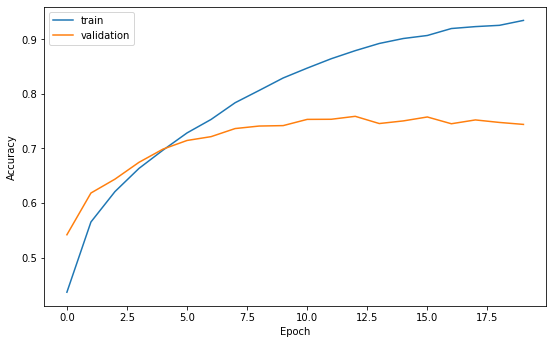

In [36]:
plt.figure(figsize=(9,5.5))
plt.plot(history.history['acc'],label="train")
plt.plot(history.history['val_acc'],label="validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc = "best")
plt.show()

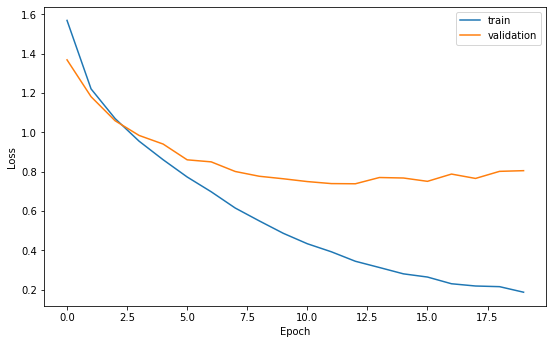

In [37]:
plt.figure(figsize=(9,5.5))
plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc = "best")
plt.show()

In [28]:
# --  儲存模型 -- #
cnn.save('CNN_Model.h5')

In [29]:
# -- 儲存模型權重-- #
cnn.save_weights('CNN_weights.h5')

In [30]:
# -- 載入模型 -- #
from tensorflow.keras.models import load_model

old_cnn = load_model('CNN_Model.h5')
print('載入模型成功')

載入模型成功


# 使用測試資料評估神經網路

In [39]:
# evaluate
test_loss, test_val = cnn.evaluate(x_test_norm,y_test_onehot)
print('測試資料損失值:', test_loss)
print('測試資料準確度:', test_val)

313/313 [==============================] - 4s 12ms/step - loss: 0.8211 - acc: 0.7335
測試資料損失值: 0.821082353591919
測試資料準確度: 0.7335000038146973


In [40]:
# predict
predict_prop = cnn.predict(x_test_norm)
print('第一筆測試資料的預測機率', predict_prop[0])

第一筆測試資料的預測機率 [5.9546714e-05 1.8179212e-03 2.6814698e-03 8.9608890e-01 4.7958715e-04
 9.6828952e-02 1.9475966e-04 3.9286236e-04 1.4444774e-03 1.1544186e-05]


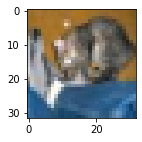

In [41]:
# -- 查看測試資料的第 1 張圖片 -- #
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(2, 2)
plt.imshow(x_test[0])
plt.show()

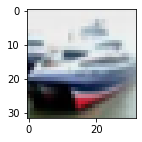

In [42]:
# -- 查看測試資料的第 2 張圖片 -- #
fig = plt.gcf()
fig.set_size_inches(2, 2)
plt.imshow(x_test[1])
plt.show()

In [46]:
# -- 直接預測數字標籤 -- #
import numpy as np
predict_class = cnn.predict(x_test_norm)
predict_class = np.argmax(predict_class,axis=1)
print('前 10 筆預測標籤:', predict_class[: 10])
print('前 10 筆原始標籤:', y_test[: 10].reshape(10))

前 10 筆預測標籤: [3 8 8 0 6 6 1 6 3 1]
前 10 筆原始標籤: [3 8 8 0 6 6 1 6 3 1]
